In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import warnings 
warnings.filterwarnings('ignore')
import glob

In [ ]:
!wget -r ftp://tremplin.epfl.ch:21/FoodImage/Food-5K.zip --ftp-user=datasets@mmspgdata.epfl.ch --ftp-password=ohsh9jah4T

--2023-02-23 15:20:38--  ftp://tremplin.epfl.ch/FoodImage/Food-5K.zip
           => ‘tremplin.epfl.ch/FoodImage/.listing’
Resolving tremplin.epfl.ch (tremplin.epfl.ch)... 128.178.218.41, 2001:620:618:1da:7:80b2:da01:3
Connecting to tremplin.epfl.ch (tremplin.epfl.ch)|128.178.218.41|:21... connected.
Logging in as datasets@mmspgdata.epfl.ch ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /FoodImage ... done.
==> PASV ... done.    ==> LIST ... done.

tremplin.epfl.ch/Fo     [ <=>                ]     221  --.-KB/s    in 0s      

2023-02-23 15:20:39 (1.34 MB/s) - ‘tremplin.epfl.ch/FoodImage/.listing’ saved [221]

Removed ‘tremplin.epfl.ch/FoodImage/.listing’.
--2023-02-23 15:20:39--  ftp://tremplin.epfl.ch/FoodImage/Food-5K.zip
           => ‘tremplin.epfl.ch/FoodImage/Food-5K.zip’
==> CWD not required.
==> PASV ... done.    ==> RETR Food-5K.zip ... done.
Length: 446919921 (426M)

tremplin.epfl.ch/Fo 100%[===================>] 426.22M  98.8MB/s   

In [ ]:
!unzip -qq -o /content/tremplin.epfl.ch/FoodImage/Food-5K.zip

In [ ]:
! ls training

0_0.jpg     0_1387.jpg	0_422.jpg  0_809.jpg   1_1195.jpg  1_230.jpg  1_617.jpg
0_1000.jpg  0_1388.jpg	0_423.jpg  0_80.jpg    1_1196.jpg  1_231.jpg  1_618.jpg
0_1001.jpg  0_1389.jpg	0_424.jpg  0_810.jpg   1_1197.jpg  1_232.jpg  1_619.jpg
0_1002.jpg  0_138.jpg	0_425.jpg  0_811.jpg   1_1198.jpg  1_233.jpg  1_61.jpg
0_1003.jpg  0_1390.jpg	0_426.jpg  0_812.jpg   1_1199.jpg  1_234.jpg  1_620.jpg
0_1004.jpg  0_1391.jpg	0_427.jpg  0_813.jpg   1_119.jpg   1_235.jpg  1_621.jpg
0_1005.jpg  0_1392.jpg	0_428.jpg  0_814.jpg   1_11.jpg    1_236.jpg  1_622.jpg
0_1006.jpg  0_1393.jpg	0_429.jpg  0_815.jpg   1_1200.jpg  1_237.jpg  1_623.jpg
0_1007.jpg  0_1394.jpg	0_42.jpg   0_816.jpg   1_1201.jpg  1_238.jpg  1_624.jpg
0_1008.jpg  0_1395.jpg	0_430.jpg  0_817.jpg   1_1202.jpg  1_239.jpg  1_625.jpg
0_1009.jpg  0_1396.jpg	0_431.jpg  0_818.jpg   1_1203.jpg  1_23.jpg   1_626.jpg
0_100.jpg   0_1397.jpg	0_432.jpg  0_819.jpg   1_1204.jpg  1_240.jpg  1_627.jpg
0_1010.jpg  0_1398.jpg	0_433.jpg  0_81.jpg    1_1205.j

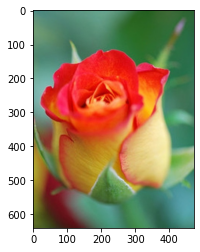

In [ ]:
plt.imshow(plt.imread('/content/training/0_808.jpg'))

In [ ]:
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/food/
!mkdir data/train/nonfood/
!mkdir data/test/food/
!mkdir data/test/nonfood/


In [ ]:
!mv training/0*.jpg data/train/nonfood/
!mv training/1*.jpg data/train/food/
!mv validation/0*.jpg data/test/nonfood/
!mv validation/1*.jpg data/test/food/

In [ ]:
train_path='/content/data/train'
valid_path='/content/data/test'

In [ ]:
Image_size=[200,200]
image_files=glob.glob(train_path+"/*/*.jpg")
valid_image_files=glob.glob(valid_path+"/*/*.jpg")

In [ ]:
import os
print(len(os.listdir('/content/data/train/food'))+len(os.listdir('/content/data/train/nonfood')))
print(len(os.listdir('/content/data/test/food'))+len(os.listdir('/content/data/test/nonfood')))

3000
1000


In [ ]:
valid_image_files

In [ ]:
folders=glob.glob(train_path+"/*")
folders

['/content/data/train/food', '/content/data/train/nonfood']

In [ ]:
vgg=tf.keras.applications.vgg16.VGG16(input_shape=[200,200,3],weights='imagenet',include_top=False)
vgg.trainable=False

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
x=tf.keras.layers.Flatten()(vgg.output)
i=tf.keras.layers.Dense(2,activation='softmax')(x)

In [ ]:
model=tf.keras.models.Model(inputs=vgg.input,outputs=i)

In [ ]:
gen =tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
        height_shift_range=0.1, shear_range=0.15, zoom_range=0.2,
        channel_shift_range=10., horizontal_flip=True,preprocessing_function=tf.keras.applications.vgg16.preprocess_input)


In [ ]:
batch_size=128

In [ ]:
train_gen=gen.flow_from_directory(train_path,target_size=[200,200],batch_size=batch_size)
valid_gen=gen.flow_from_directory(valid_path,target_size=[200,200],batch_size=batch_size)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=train_gen,validation_data=valid_gen,validation_steps=int(np.ceil(len(valid_image_files))/batch_size),steps_per_epoch=int(np.ceil(len(image_files))/batch_size),epochs=10,verbose=2)


Epoch 1/10
23/23 - 84s - loss: 1.4875 - accuracy: 0.9164 - val_loss: 0.6135 - val_accuracy: 0.9732 - 84s/epoch - 4s/step
Epoch 2/10
23/23 - 66s - loss: 0.5646 - accuracy: 0.9767 - val_loss: 0.7645 - val_accuracy: 0.9721 - 66s/epoch - 3s/step
Epoch 3/10
23/23 - 64s - loss: 0.4200 - accuracy: 0.9795 - val_loss: 0.7709 - val_accuracy: 0.9688 - 64s/epoch - 3s/step
Epoch 4/10
23/23 - 61s - loss: 0.2984 - accuracy: 0.9826 - val_loss: 0.5643 - val_accuracy: 0.9777 - 61s/epoch - 3s/step
Epoch 5/10
23/23 - 60s - loss: 0.2195 - accuracy: 0.9878 - val_loss: 0.8213 - val_accuracy: 0.9721 - 60s/epoch - 3s/step
Epoch 6/10
23/23 - 77s - loss: 0.1948 - accuracy: 0.9899 - val_loss: 1.3717 - val_accuracy: 0.9542 - 77s/epoch - 3s/step
Epoch 7/10
23/23 - 69s - loss: 0.3490 - accuracy: 0.9861 - val_loss: 1.2546 - val_accuracy: 0.9576 - 69s/epoch - 3s/step
Epoch 8/10
23/23 - 73s - loss: 0.2760 - accuracy: 0.9875 - val_loss: 1.2673 - val_accuracy: 0.9609 - 73s/epoch - 3s/step
Epoch 9/10
23/23 - 64s - loss: 0

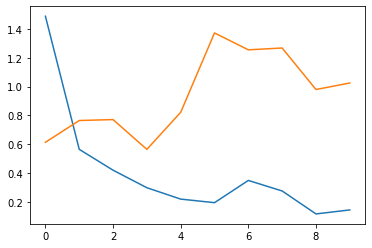

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.show()

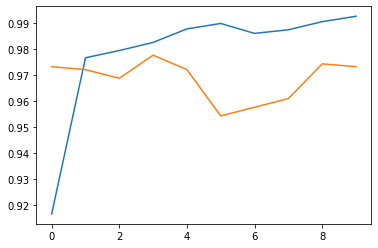

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.show()